- Combine news and stock data
- Load all news data into single table
- load all stock data into single table

- Final data columns -> date, stock, closing price, headline, ticker

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import datetime
import matplotlib.pyplot as plt
import math

In [3]:
mining_companies = ["ALB", "LAC", "SQM"]
battery_companies = ["CBAT", "ENS", "TIA"]

mining_headers = [x + "_Min" for x in mining_companies]
battery_headers = [x + "_Bat" for x in battery_companies]

price_col = "Close"
date_col = "Date"

battery_data_file_format = "StockData/battery_manufacturers/stationary/{symbol}_bat__stationary_close.csv"
mining_data_file_format = "StockData/mining/stationary/{symbol}_min__stationary_close.csv"

num_days = 3000
start_date = datetime.datetime.strptime("01/01/2015", "%d/%m/%Y")
date_list = [start_date + datetime.timedelta(days=x) for x in range(num_days)]

In [4]:
blank_df_generator = ((date_) for date_ in date_list)

In [5]:
stock_df = pd.DataFrame(blank_df_generator, columns=[date_col])

# Load all Battery Manufacturer's data
for battery_company, battery_header in zip(battery_companies, battery_headers):
    print(battery_data_file_format.format(symbol = battery_company), battery_header)
    temp_df = pd.read_csv(battery_data_file_format.format(symbol = battery_company))
    temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns
    temp_df[date_col] = temp_df[date_col].apply((lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))) # convert dates to datetiem objects
    stock_df = stock_df.merge(temp_df, on=date_col, how='outer') # join
    stock_df = stock_df.rename(columns = {"Close": battery_header})

# # Load all Mining Company's data
for mining_company, mining_header in zip(mining_companies, mining_headers):
    print(battery_data_file_format.format(symbol = mining_company), mining_header)
    temp_df = pd.read_csv(mining_data_file_format.format(symbol = mining_company))
    temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns
    temp_df[date_col] = temp_df[date_col].apply((lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))) # convert dates to datetiem objects
    stock_df = stock_df.merge(temp_df, on=date_col, how='outer') # join
    stock_df = stock_df.rename(columns = {"Close": mining_header})

stock_df = stock_df.dropna()
stock_df.reset_index(inplace=True)

StockData/battery_manufacturers/stationary/CBAT_bat__stationary_close.csv CBAT_Bat
StockData/battery_manufacturers/stationary/ENS_bat__stationary_close.csv ENS_Bat
StockData/battery_manufacturers/stationary/TIA_bat__stationary_close.csv TIA_Bat
StockData/battery_manufacturers/stationary/ALB_bat__stationary_close.csv ALB_Min
StockData/battery_manufacturers/stationary/LAC_bat__stationary_close.csv LAC_Min
StockData/battery_manufacturers/stationary/SQM_bat__stationary_close.csv SQM_Min


/var/folders/cq/fj8rt2fd4nlfxk_h0rvdd28w0000gn/T/ipykernel_48544/1747426891.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns
/var/folders/cq/fj8rt2fd4nlfxk_h0rvdd28w0000gn/T/ipykernel_48544/1747426891.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns


In [6]:
stock_df.head()

,index,Date,CBAT_Bat,ENS_Bat,TIA_Bat,ALB_Min,LAC_Min,SQM_Min
0,4,2015-01-05,1.80,60.000000,8.283043,58.310001,2.35,23.242455
1,5,2015-01-06,1.75,58.500000,8.448862,57.169998,2.40,22.911392
2,6,2015-01-07,1.79,59.029999,8.444914,56.939999,2.45,22.901655
3,7,2015-01-08,1.96,60.410000,8.375823,58.730000,2.40,22.833496
4,8,2015-01-09,1.95,60.240002,8.419251,59.020000,2.45,23.300877


### Cross-correlation

In [7]:
import statsmodels.api as sm

ALB_Min CBAT_Bat [58.31000137 57.16999817 56.93999863 58.72999954 59.02000046] [1.79999995 1.75       1.78999996 1.96000004 1.95000005]
ALB_Min, CBAT_Bat: Highest correlation at a lag of 770 days.
ALB_Min ENS_Bat [58.31000137 57.16999817 56.93999863 58.72999954 59.02000046] [60.         58.5        59.02999878 60.40999985 60.24000168]
ALB_Min, ENS_Bat: Highest correlation at a lag of 0 days.
ALB_Min TIA_Bat [58.31000137 57.16999817 56.93999863 58.72999954 59.02000046] [8.28304291 8.44886208 8.44491386 8.37582302 8.41925144]
ALB_Min, TIA_Bat: Highest correlation at a lag of 0 days.
LAC_Min CBAT_Bat [2.3499999  2.4000001  2.45000005 2.4000001  2.45000005] [1.79999995 1.75       1.78999996 1.96000004 1.95000005]
LAC_Min, CBAT_Bat: Highest correlation at a lag of 946 days.
LAC_Min ENS_Bat [2.3499999  2.4000001  2.45000005 2.4000001  2.45000005] [60.         58.5        59.02999878 60.40999985 60.24000168]
LAC_Min, ENS_Bat: Highest correlation at a lag of 254 days.
LAC_Min TIA_Bat [2.349999

<Figure size 432x288 with 0 Axes>

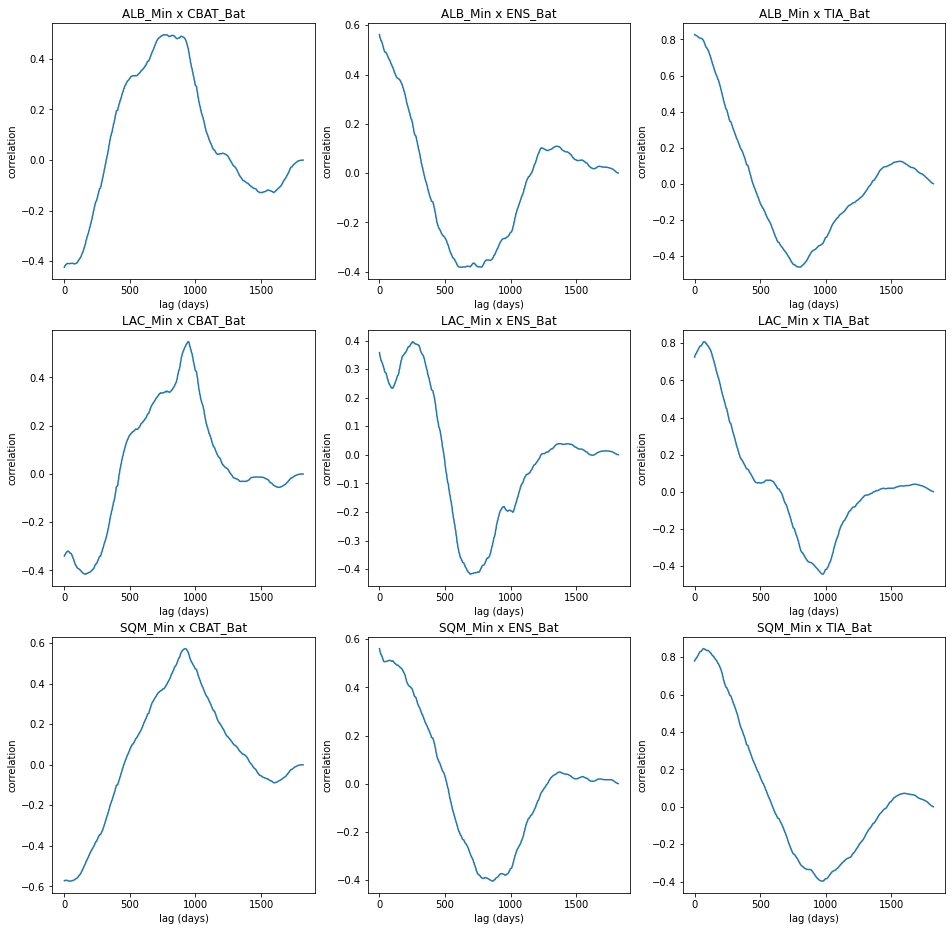

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16, 16))

for idx, (mining_company, battery_company) in enumerate(itertools.product(mining_headers, battery_headers)):

    def calculate_days_delta(date_series, num_lag_rows):
        first_date = date_series[0]
        second_date = date_series[num_lag_rows]
        delta = second_date - first_date
        return delta.days

    mining_company_array = stock_df[mining_company].to_numpy()
    battery_company_array = stock_df[battery_company].to_numpy()
    print(mining_company, battery_company, mining_company_array[0:5], battery_company_array[0:5])
    result = sm.tsa.stattools.ccf(mining_company_array, battery_company_array, adjusted=False)

    day_lags = [calculate_days_delta(stock_df["Date"], i) for i in range(len(result))]
    num_lag_rows = np.argmax(result)
    num_lag_days = day_lags[num_lag_rows]

    print(f"{mining_company}, {battery_company}: Highest correlation at a lag of {num_lag_days} days.")
    plt.figure(idx)
    ax = sns.lineplot(x=day_lags, y=result, ax=axs[idx//3][idx%3])
    ax.set(ylabel='correlation', xlabel='lag (days)', title=f'{mining_company} x {battery_company}')


### Evaluation

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

DATA_START_DATE, DATA_END_DATE = None, None
TRAIN_START_DATE, TRAIN_END_DATE = None, None
VALIDATION_START_DATE, VALIDATION_END_DATE = None, None


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def rolling_window_eval(df, train_window_size, prediction_fn, data_col_name="Close"):
    rmse_list = []
    mape_list = []

    for train_window_start in range(0, len(train_df), train_window_size):
        train_df = df.iloc[train_window_start: train_window_start + train_window_size, :]
        eval_df = df.iloc[min(len(df)-1, train_window_start + train_window_size), :]
        
        actual = eval_df[data_col_name]
        predicted = prediction_fn(train_df)
    
        rmse = mean_squared_error([actual], [predicted], squared=False)
        mape = mean_absolute_percentage_error([actual], [predicted])
        
        rmse_list.append(rmse)
        mape_list.append(mape)
    
    return np.average(rmse_list), np.average(mape_list)


def evaluate():
    # Split data into train, test
    # Fit model on train
    # Evaluate on test
    avg_rmse, avg_mape = rolling_window_eval(df, train_window_size, prediction_fn, "Close")

### Exponential smoothing

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

RMSE: 1.916089065767946, MAPE: 1.6121263232610397


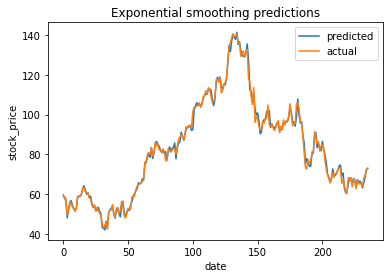

In [45]:
num_to_predict = 300
stock_prices = stock_df['ALB_Min'].to_numpy()

predictions = []
actuals = []
df = stock_df
train_window_size = 5
for train_window_start in range(0, len(stock_df), train_window_size):
    train_df = df.iloc[train_window_start: train_window_start + train_window_size, :]
    eval_df = df.iloc[min(len(df)-1, train_window_start + train_window_size), :]

    model = SimpleExpSmoothing(train_df['ALB_Min'].to_numpy(), initialization_method="estimated").fit(smoothing_level=0.8)
    predicted = model.forecast(1)
    actual = eval_df['ALB_Min']

    predictions.append(predicted[0])
    actuals.append(actual)

plt.figure()

ax = sns.lineplot(
    x=list(range(len(predictions))),
    y=predictions,
    label='predicted'
)

sns.lineplot(
    x=list(range(len(actuals))),
    y=actuals,
    ax=ax,
    label='actual'
)

ax.set(ylabel='stock_price', xlabel='date', title=f'Exponential smoothing predictions')

print(f'RMSE: {mean_squared_error(actuals, predictions, squared=False)}, MAPE: {mean_absolute_percentage_error(actuals, predictions)}')